<a href="https://colab.research.google.com/github/arkothiwala/deep-learning/blob/master/AV_Intel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install pixiedust
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [3]:
from google.colab import files
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('train-scene classification.zip', 'r')
zip_ref.extractall('data')
zip_ref.close()

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import fastai

In [0]:
#batch size
bs = 64

In [0]:
path_img = 'data/train'
fnames = get_image_files(path_img)

In [20]:
fnames[:5]

[PosixPath('data/train/18693.jpg'),
 PosixPath('data/train/11832.jpg'),
 PosixPath('data/train/12212.jpg'),
 PosixPath('data/train/12191.jpg'),
 PosixPath('data/train/12072.jpg')]

In [34]:
help(ImageDataBunch.from_csv)

Help on method from_csv in module fastai.vision.data:

from_csv(path:Union[pathlib.Path, str], folder:Union[pathlib.Path, str]='.', label_delim:str=None, csv_labels:Union[pathlib.Path, str]='labels.csv', valid_pct:float=0.2, fn_col:int=0, label_col:int=1, suffix:str='', header:Union[int, str, NoneType]='infer', **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from a csv file in `path/csv_labels`.



In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../train.csv', size=150, bs=bs).normalize(imagenet_stats)

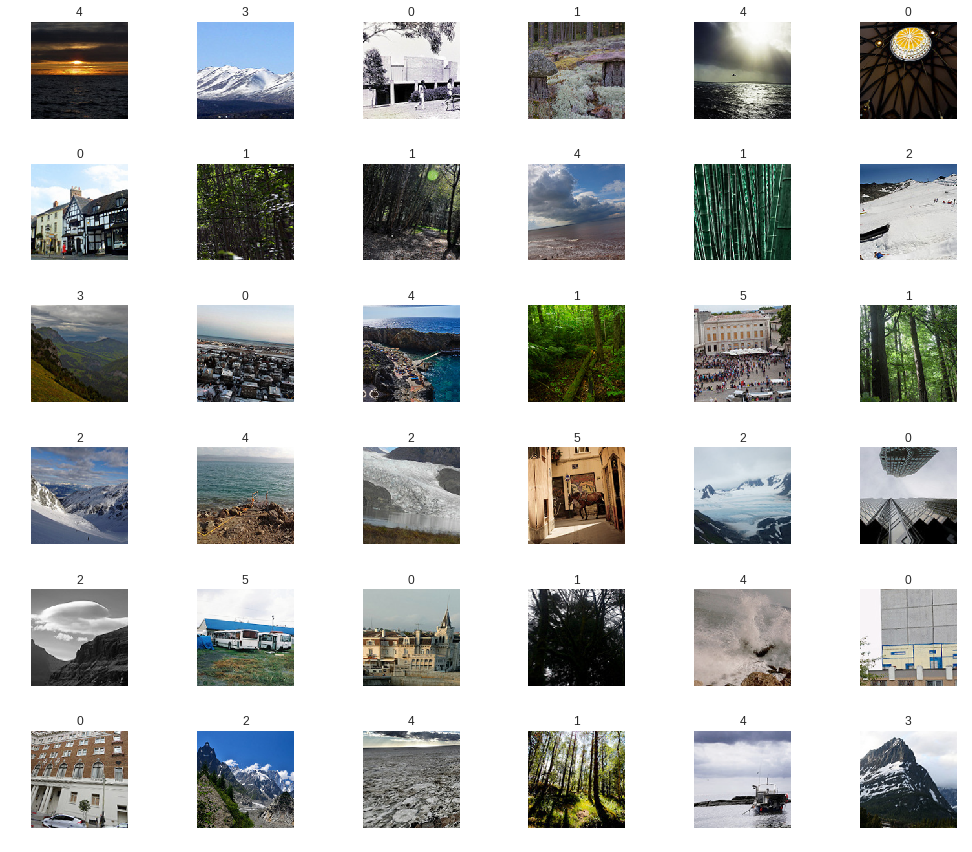

In [42]:
data.show_batch(rows=6, figsize=(14,12))

In [43]:
data.classes

[0, 1, 2, 3, 4, 5]

In [48]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 98904592.17it/s]


In [49]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.470165,0.280224,0.098356
2,0.337403,0.214924,0.078978
3,0.274205,0.198992,0.069877
4,0.260533,0.192982,0.072519


In [51]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.212542,0.204689,0.073987
2,0.230754,0.181761,0.066353
3,0.197849,0.163222,0.061950
4,0.177857,0.165607,0.061069


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

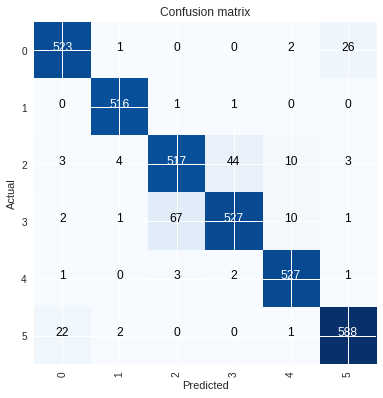

In [59]:
interp.plot_confusion_matrix()

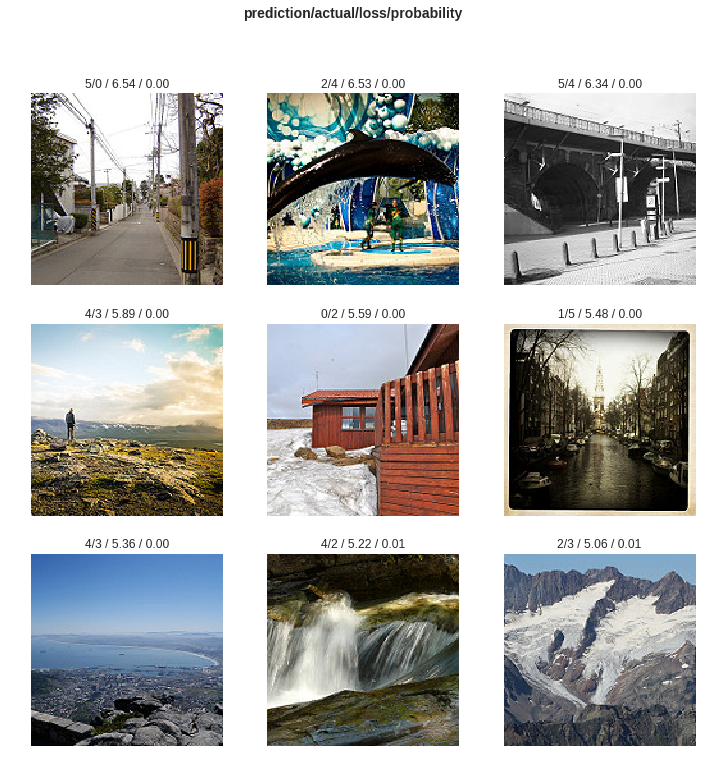

In [66]:
interp.plot_top_losses(9)

In [82]:
interp.y_true

tensor([2, 1, 4,  ..., 5, 2, 4])

In [84]:
show_doc(ImageDataBunch.from_csv)

NameError: ignored

In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), csv_labels='../train.csv', size=150, bs=bs).normalize(imagenet_stats)